In [3]:
%matplotlib notebook
import json
import pandas as pd
import matplotlib.pyplot as plt
from csv import DictWriter
import re
tweets_data=[]
tweets_data_path='testdata2.txt'

tweets_file=open(tweets_data_path,'r')
database=open("tweetsforlang1.csv",'w')
tweets_file.seek(0)
tweet=dict()
for line in tweets_file:
    try:
        tweet=json.loads(line)
        tweets_data.append(tweet)
        #by analysis it was found that they are nexted dictionaries and causing problems
        tweet.pop('user',None)
        tweet.pop('entities',None)
        writer = DictWriter(database, tweet[0].keys())
        writer.writeheader()
        writer.writerows(tweet)
        database.write('sd\n')
        # print(str(i)+". "+t['text'])
        #print("lang:"+t['lang'])
        # print("countrty:"+tweet["place"]["country"])
    except:
       # print("try fail")
        continue
tweets_file.close()
database.close()

print("There are "+ str(len(tweets_data))+" tweets collected in the file")

There are 2100 tweets collected in the file


In [4]:

for key,val in tweet.items():
    if val!=None:
        print(key+" : "+ str(val))
        print('\n')


filter_level : low


retweet_count : 0


favorite_count : 0


text : mokuji.js (1.3.0): https://t.co/o6QeQR6Kfa A table of content JavaScript Library


id : 877418710163742721


lang : en


favorited : False


created_at : Wed Jun 21 06:51:36 +0000 2017


timestamp_ms : 1498027896811


is_quote_status : False


truncated : False


source : <a href="https://github.com/bcoe/npm-tweets" rel="nofollow">npmtweets</a>


retweeted : False


id_str : 877418710163742721


possibly_sensitive : False




In [5]:
#next we will structure the tweers data into a pandas DataFrame to simplify
#the manipulation
tweets=pd.DataFrame()
#empty data frame

In [6]:
#add 3 columns to the tweets DataFrame called text,lang and country.
#Text: column contains the tweet
#lang:language in which te tweet was written
#country:country from where the tweet was sent

tweets["text"]=list(map(lambda tweet: tweet["text"],tweets_data))
tweets["lang"]=list(map(lambda tweet: tweet["lang"],tweets_data))
tweets["country"]=list(map(lambda tweet: tweet["place"]["country"] if tweet["place"]!=None else None,tweets_data))


<IPython.core.display.Javascript object>


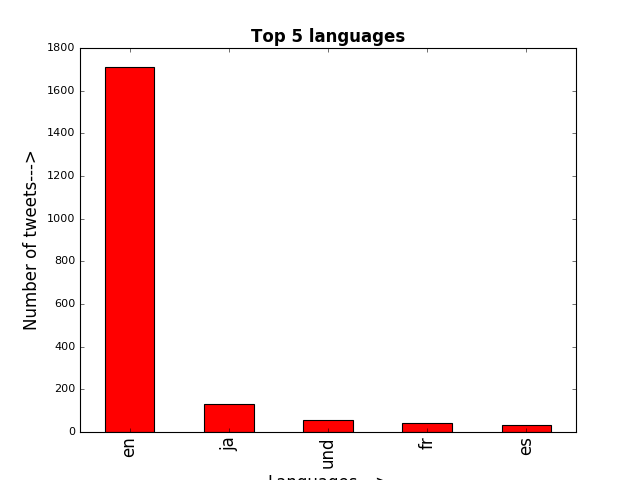

In [7]:

#create 2 charts
#one for top 5 languages in which the tweets were written
#second, the top 5 countries from which the tweets were sent

tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages--->', fontsize=15)
ax.set_ylabel('Number of tweets--->' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
#fig.show()

<IPython.core.display.Javascript object>


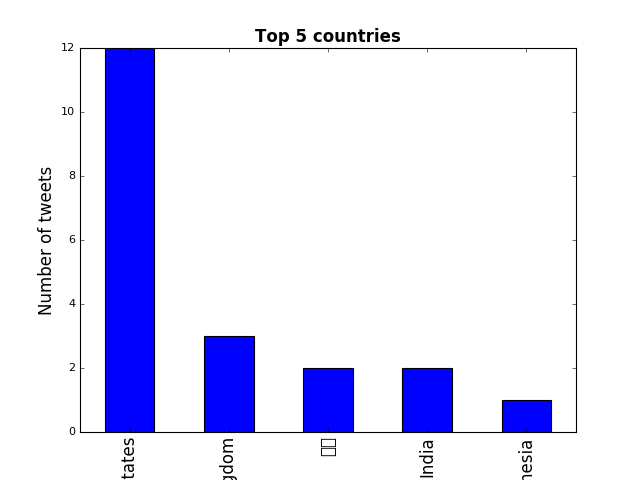

In [8]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')

In [9]:
def word_match(word,text):
    if re.search(word.lower(),text.lower()):
        return True
    else:
        return False
    
word="ada"
text="vdbfbs ad dgffada ada fdfdg. "
word_match(word,text)

True

In [10]:
#Next, we will add 3 columns to our tweets DataFrame.

tweets['python']=tweets['text'].apply(lambda tweet:word_match('python',tweet))      
tweets['javascript']=tweets['text'].apply(lambda tweet:word_match('javascript',tweet))
tweets['ruby']=tweets['text'].apply(lambda tweet:word_match('ruby',tweet))
print("Python:"+str(tweets['python'].value_counts()[True]))
print("Javascript:"+str(tweets['javascript'].value_counts()[True]))
print("Ruby:"+str(tweets['ruby'].value_counts()[True]))

Python:553
Javascript:682
Ruby:700


<IPython.core.display.Javascript object>


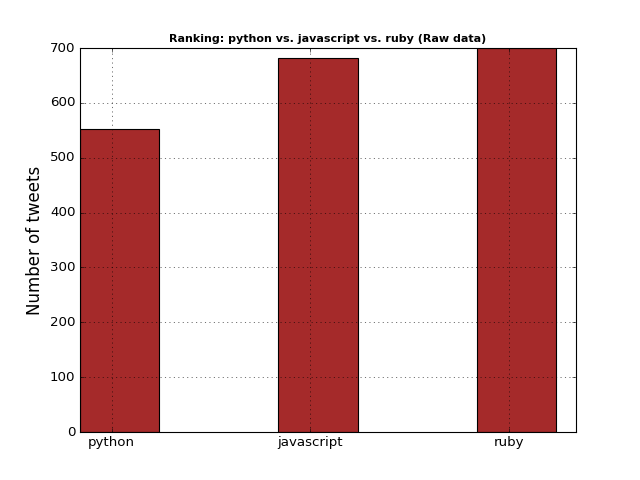

In [11]:
prg_langs = ['python', 'javascript', 'ruby']
tweets_by_prg_lang = [tweets['python'].value_counts()[True], tweets['javascript'].value_counts()[True], tweets['ruby'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.4
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='brown')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [12]:
#targetting tweets that are related to programming languages,having one of the 2 keywords: "programming" or "tutorial"
tweets['programming'] = tweets['text'].apply(lambda tweet: word_match('programming', tweet))
tweets['tutorial'] = tweets['text'].apply(lambda tweet: word_match('tutorial', tweet))

In [13]:
#combinig the keywords for relevant tweet
tweets['relevant'] = tweets['text'].apply(lambda tweet: word_match('programming', tweet) or word_match('tutorial', tweet))

In [14]:
print(tweets['relevant'].value_counts()[True])
print(tweets['programming'].value_counts()[True])
print(tweets['tutorial'].value_counts()[True])

91
66
25


<IPython.core.display.Javascript object>


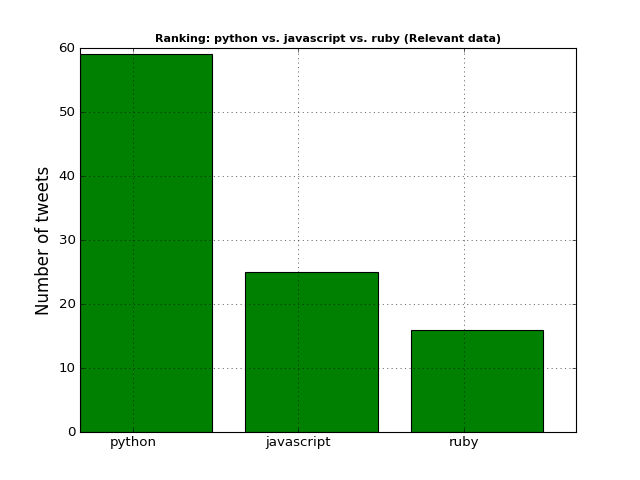

In [15]:
tweets_by_prg_lang = [tweets[tweets['relevant'] == True]['python'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['javascript'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['ruby'].value_counts()[True]]
x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width,alpha=1,color='g')
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: python vs. javascript vs. ruby (Relevant data)', fontsize=10, fontweight='bold') 
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

### Extracting relevant links related to the programming languages from the data

In [16]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

In [17]:
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))


In [18]:
tweets_relevant = tweets[tweets['relevant'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']


In [19]:
links_file=open("links.csv",'w')
links_file.write("\nrelevant links::\n\n")
links_file.write("\n\nPython:\n")
df=tweets_relevant_with_link[tweets_relevant_with_link['python'] == True]['link']
df.to_csv(links_file, index=False, encoding='utf-8')
print("python links:")
print (df)

links_file.write("\n\nJavascript:\n")
df1=tweets_relevant_with_link[tweets_relevant_with_link['javascript'] == True]['link']
df1.to_csv(links_file,index=False,encoding ='utf-8')
print("javascript links:")
print (df1)

links_file.write("\n\nRuby:\n")
df2=tweets_relevant_with_link[tweets_relevant_with_link['ruby'] == True]['link']
df2.to_csv(links_file,index=False,encoding ='utf-8')
print("Ruby links:")
print (df2)
data={
    "Python":df, "Javascript":df1, "Ruby":df2
  }
df3=pd.DataFrame(data,columns=["Python","Javascript","Ruby"])
df3.to_csv(links_file,index=False,encoding ='utf-8')
#print(df3)

python links:
93       https://t.co/RDUirSwMC6
107      https://t.co/RDUirSwMC6
126      https://t.co/HKfkOsmre1
152     https://t.co/HKfkOsmre1…
242      https://t.co/SeC3vAXlwe
257      https://t.co/b74fwzzBdD
433      https://t.co/F1l5QtbvjA
448      https://t.co/F1l5QtbvjA
453      https://t.co/ozR0B8ra1y
511      https://t.co/aZBo2Fjl9l
538      https://t.co/UNXkY65alP
558      https://t.co/x8etmK9Opg
583      https://t.co/x8etmK9Opg
614      https://t.co/piDTE2FnBV
748       https://t.co/yp1WpbPl…
753      https://t.co/SBkv8gNB1h
768      https://t.co/LHoJV8yvNB
921      https://t.co/NuwKd6uVaK
961      https://t.co/EY6tktt9kX
1107     https://t.co/qPC8xIMppS
1223     https://t.co/UNXkY65alP
1281     https://t.co/13oMD47cME
1289      https://t.co/yp1WpbPl…
1299     https://t.co/qPC8xIMppS
1353     https://t.co/xt3P6onWk1
1466      https://t.co/yp1WpbPl…
1509     https://t.co/mQWp9VrpTV
1568     https://t.co/ZaNQrpFN6E
1574     https://t.co/prURZs95v9
1600     https://t.co/TewEMVd